# Introduction to NumPy


## What is NumPy? (1/2)

* A library to manipulate **arrays**
* An array is an **indexable collection** of items of the **same type**
    * Indexable means we can fetch specific parts of the array by their location  
* Arrays are **mutable** by default -- we can modify values
    * New values need to be compatible with the **type**
    * Can make them **immutable** (use `.setflags(write=False)` on an array)


NumPy is one the most important tools in the Python eco-system. At its core it is a library for creating and manipulating arrays - it provides extensive functionality for doing everything you could want to do with your arrays.

Arrays are a lot like Python "lists", with the one caveat that in a NumPy array, every element must be of the same datatype. "Datatype" here, for example, could be integers, strings of characters, floating point numbers etc.

NumPy makes the array indexable, meaning that each item in the array is assigned a number, corresponding to their location in memory, and we can fetch specific items by their number (which we call an *index*).

Arrays are *mutable* by default, which means that we can modify values in place. Strings, for example, are *immutable* in python, meaning you can't change individual characters in a string once you have intialised it. Instead, if you want to make changes to a string, you have to create a new copy with the altered character. By contrast, NumPy, by default, will let you change items in the array without having to create new copies. Of course, any alteration has to agree with the datatype that the array uses. 

Sometimes we might want to disable this functionality, and we can use `setflags` to do this. You might want to do this for example if you're calling an external piece of code and you want to be sure that the items in the array aren't modified during execution.


## What is NumPy? (2/2)
* NumPy makes manipulating arrays **fast** and **easy** 
* Apply mathematical operations over specific dimensions of **multi-dimensional arrays**
* Support for many data [types](https://numpy.org/doc/stable/user/basics.types.html) 
* Many scientific packages are built on top of it (e.g. Pandas)

The reason that NumPy is used so extensively is that it makes mathematical functions very fast, efficient, and easy to write. It has easy-to-understand abstractions for thinking about multi-dimensional data, where indexing and writing efficient code can be tricky. 

It has a lot of functionality, it supports a wide range of datatypes, and usually anything that's missing can be found in a package that was built on top of NumPy (for example, you may have come across Pandas already, which is a handy library for data analysis). There are also all sorts of domain specific extensions built on top of NumPy, for financial mathematics, chemistry, physics and so on. 


## NumPy Arrays
* NumPy arrays can have as many dimensions as you like, for example, an array could be:
    * a **vector** with $n$ elements
    * a **matrix** with $m$ rows and n columns $(m,n)$
    * a **tensor** of size $(m,n,p)$
* The most common way to create a NumPy array is from a standard Python list

The key advantage of using NumPy arrays are that it has extensive support for multi-dimensional shapes. In fact, the core type name for NumPy arrays is `ndarray`, which is short for n-dimensional array. 

We can talk about arrays in two ways: their dimension and their shape. For instance, a vector with two components we say has a dimension of 1 and a shape of 2. This is a little different from linear algebra terminology where we might say that the vector had two dimensions. 

If we had a $2 \times 2$ matrix, we would say that it has two dimensions, with shape (2 by 2). We can keep going into as many dimensions as we like; for instance, we could create an array of shape (2 by 2 by 2) which would be a tensor with three dimensions.  

The most common way to make a NumPy array is from a Python list, but NumPy does also provide functions for generating arrays directly

## Practical Introduction

In [45]:
import numpy as np

np.random.seed(1)

In [46]:
a = np.array([1, 2, 3])
a

array([1, 2, 3])

In [47]:
a.shape

(3,)

The idiomatic way to import `numpy` is with the alias `np`, so that you don't have to write out `numpy` every time you want to use it. Here we call the method `np.array`, passing in a list. The method `np.array` returns a `numpy ndarray` with the values we passed in. It has one dimension, and its shape is 3 so we could think of this as being equivalent to a vector in $\mathcal{R}^3$ (i.e. with three components).

## Sizes, Shapes, and Dimensions

In [48]:
a.size

3

In [49]:
a.ndim  # number of dimensions

1

What is the dimension of `a`? In linear algebra we might say 3, but in NumPy it is dimension 1, size 3.  

So the **shape** of `a` is [3].  
The **dimension** is 1.  

The attributes `shape, size`, and `ndim` can be very useful when you run into shape mismatch problems. Often dealing with large amounts of data can quickly become confusing, so it's really worth understanding shapes and sizes. 

## 2-Dimensional Arrays

We can make a two-dimensional array (a matrix) by inputting a list of lists:

In [50]:
b = np.array([[0, 1, 2], [3, 4, 5]])
b

array([[0, 1, 2],
       [3, 4, 5]])

In [51]:
b.shape

(2, 3)

In [52]:
b.size

6

In [53]:
b.ndim

2

B has 2 rows, each with 3 elements so the total size of the array is 6. 
The array has two dimensions, indexed as 0 and 1, because there are two directions (rows and columns). 
The size of dimension 0, the rows, is 2, the size of dimension 1, the columns, is 3. 

We will often refer to the dimensions as `axes`. You could think about the data being laid out on a 2D grid and referring to the horizontal axis (i.e. the rows) as the `x` axis and the vertical axis as the `y` axis.


Notice that the `size` attribute is the equivalent of flattening out the array into a 1D list and taking its length. 

# 2-Dimensional Arrays
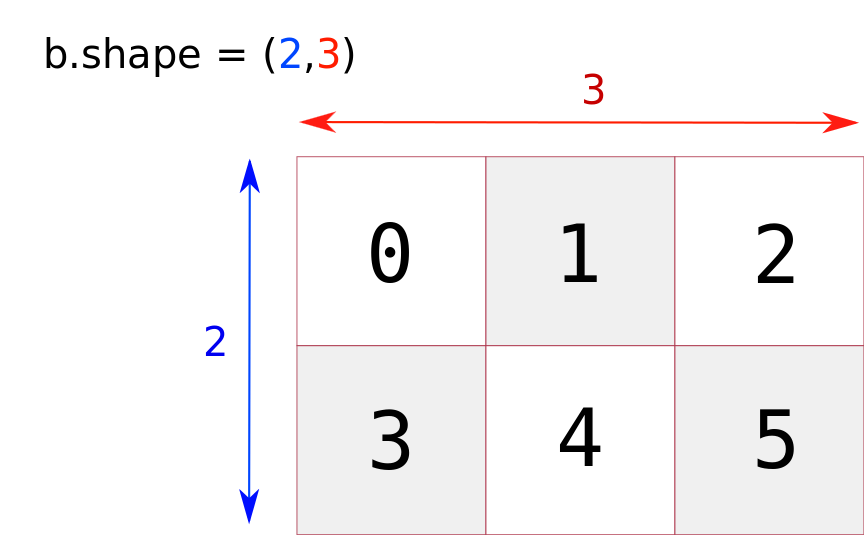

We can picture our array `b` being laid out like this image. `b` has shape (2,3), meaning it has 2 rows and 3 columns.

We can also talk about these as axes, with axis 0 being the rows and axis 1 being the columns. This is useful to bear in mind when it comes to applying operations over specific axes. For example we might want to get the mean of the rows. The mean of row 1 would be 1, and the mean of row two would be 4. In NumPy syntax we would tell `numpy` to take the mean of `b` and provide an argument `axis=0` to tell it to apply the `mean` operation over the rows.

## N-Dimensional Arrays

We can continue scaling this up to as many dimensions as we would like:

In [54]:
c = np.array([[[1, 2, 3], [4, 5, 6]], [[1, 2, 3], [4, 5, 6]]])
c

array([[[1, 2, 3],
        [4, 5, 6]],

       [[1, 2, 3],
        [4, 5, 6]]])

In [55]:
c.shape

(2, 2, 3)

In [56]:
c.size

12

In [57]:
c.ndim

3

We can continue adding dimensions or axes to our arrays by continuously nesting lists when we create the array. In this example we have two $2 \times 3$ matrices stacked on top of each other. So we have two matrices with 2 rows and 3 columns. A classic example of data represented like this would be images, where we have a spatial x,y domain, as well as separate colour channels (for example, RGB). Now we have an easy way to apply operations over each axis: we might want to grayscale the image by flattening in the channel axis, or apply edge detection in the across the height and width of the image. NumPy makes all of this very easy and efficient for us, and it all stems from this core idea of indexable ND-arrays with axes.


## Reshaping

In [58]:
b = np.array([[1, 2, 3], [4, 5, 6]])
b

array([[1, 2, 3],
       [4, 5, 6]])

In [59]:
b.shape

(2, 3)

In [60]:
b.reshape(6)

array([1, 2, 3, 4, 5, 6])

In [61]:
b.reshape(3, 2)

array([[1, 2],
       [3, 4],
       [5, 6]])

One operation that now becomes easy is reshaping. Once we understand what to expect from `.shape`, we can provide our own shapes to the reshape function and do anything from flattening out arrays to reordering dimensions. 

Imagine for example you are provided an image with the dimensions in order of height, then width, then colour channels, but your plotting code wants the colour channels to be the first dimension. Using reshape we can quickly wrangle data back into the format we are expecting.

## Indexing Arrays

To get the $n$th element of an array, we can index with `a[n]`. 
* Python/NumPy index from 0 
* We can index over multiple dimensions

In [62]:
a = np.array([1, 2, 3])
a[0]

1

In [63]:
b = np.array([[1, 2, 3], [4, 5, 6]])
b[0, 0]

1

In [64]:
b[0, 2]

3

We mentioned earlier that numpy arrays are *indexable*. What this means is that we can access individual elements by their location. Indices of arrays start from zero, so putting 0 in the square brackets after `a` means that we are asking for the first element of the array. The second has index 1 and the third has index 2.

In general, to get an individual element we need to provide as many indices as there are axes. So for the 2D array `b` we need to provide two indices. 

Can you infer what would happen if you only wrote `b[0]`? 

## Indexing Arrays 

To index a whole dimension of the array, use `:`. For instance, array `b` has two dimensions, rows and columns. 

To get the whole of row 0, we can either index as `b[0,:]` or `b[0]`

In [65]:
b[0, :]

array([1, 2, 3])

In [66]:
b[0]

array([1, 2, 3])

`b[0]` will return the first *row* of the array. `b` is of shape 2 by 3 (i.e. 2 rows, 3 columns) so `b[0]` is row 1 and `b[1]` is row 2. 

But what about columns? In order to get the first column we have to make use of the colon operator (:). The colon tells numpy to return the whole dimension corresponding to the axis wherever the colon is.

So if we index the row axis with a 0 and the column axis with a colon then we get everything in the row axis indexed by 0 (that is, the whole first row).

## Indexing Arrays

The columns are the second dimension, so to get the whole of column 0 we do:

In [67]:
b[:, 0]

array([1, 4])

So the syntax `b[M,N]` indexes `b` by row `M` and column `N`.

Similarly, if we wanted to get the first column, we would index the row axis with a colon and the column axis with a 0. This says to numpy: get all elements from the 0th column.

## Indexing continued

We can index with a **list** too. Say we want the first, second, and fourth elements of a:

In [68]:
a = np.array([0, 1, 2, 3, 4, 5])
indices = [0, 1, 3]
a[indices]

array([0, 1, 3])

In addition to indexing with individual numbers, we can also index with a *list* of numbers. NumPy will now return a list, populated by the items from the array at the given indices. 

## Boolean Indexing

We can also do indexing by True/False statements:

In [69]:
a = np.array([0, 1, 2, 3, 4, 5])
a > 3

array([False, False, False, False,  True,  True])

We can use this mask to index `a` itself:

In [70]:
a[a > 3]

array([4, 5])

Another way to index is by creating a list of booleans (True/False). These act like a mask; NumPy will return values whose corresponding mask value is True.  

For example, we could get a mask which indexes all the elements of `a` that are greater than 3.

We can use normal python predicates to get the mask, which we then have to use to index `a` itself if we want just the elements greater than 3. 

## Slicing

We can slice up arrays into sub-arrays by providing a lower and upper (exclusive) index:

In [71]:
a = np.array([0, 1, 2, 3, 4, 5])

a[1:4]

array([1, 2, 3])

Get the first and last 3 elements of the array:

In [72]:
a[:3]

array([0, 1, 2])

In [73]:
a[3:]

array([3, 4, 5])

Yet another way to index is by slicing. We use the syntax `lower-index, colon, upper-index` to denote the start and end of the slice.

In the example of `a`, each element number corresponds to its index. So indexing by `1:4` means we grab elements at indices 1, 2, and 3. The upper index is not inclusive. 

If we don't provide one of the bounds, then numpy will return everything on the other side of the bound we did provide. So if we only provide the upper bound of 3, then numpy will return everything up to the third index. Likewise, if we only provide the lower bound of 3, then numpy will return everything from the third index to the end. Notice that the lower index is inclusive, and the upper index is not.

## Slicing

You can also count back from the end of the array using a minus sign:


In [74]:
a[-3:]

array([3, 4, 5])

So `-3` means count back 3 indices from the end of `a`, and `:` returns all elements after this position.

How would you get all the elements before the item in position `-3`?  
How about just the last element?

We can use negative indexing to count backwards. So -3 means count back 3 indices from the end of `a`. Indexing `a` just by -3 (without the colon) would return the individual element that was 3 indices from the end of the array. 
The colon means that we get everything after that position.

Can you think about how you would get all the elements *before*, instead of *after* the item in position -3? The answer is to put the colon in front of the -3, which means that numpy will return everything in front of the item at index -3. 

How about just getting the last element? This is actually a trick that gets used quite often - when you are unsure of the length of the array but want the last element. For this we just use the index -1, which says to numpy to count back 1 position from the end of the array.

## Slicing in multiple dimensions

Just as with regular indexing, we can slice index over multiple dimensions:

In [75]:
b = np.array([[1, 2, 3], [4, 5, 6]])

# columns 0 and 1
b[:, 0:2]

array([[1, 2],
       [4, 5]])

In [76]:
# row 0, columns 0 and 1
b[0, 0:2]

array([1, 2])

As with everything numpy, this scales up to multiple dimensions very easily.

If we have an array `b` with a row and a column dimension, then we can use slices in any of the indexing positions. In the first example we use a colon in the row index position, meaning return everything in the column indices 0:2. Remember that the upper bound is not inclusive, so this is going to get us the columns 0 and 1. 

What about if we want the columns 0 and 1 but not all the rows, just the first row? Then we use the slice as usual in the column position, but this time we specify the row to be the row indexed by 0.

## NumPy Functions

NumPy makes it easy to apply **functions** to **arrays**:
- Maths functions (`np.sin, np.sum, np.round, np.exp`)
- Logic (`np.equal, np.allclose, np.any`)
- Sorting, searching, counting (`np.argwhere, np.sort`)
- and many more!

For example:

In [77]:
a = np.array([1, 2, 3])
np.sum(a)

6

Now that we can slice up arrays to get the sub-blocks we want, we can start to think about applying standard numpy functionality to the arrays.

NumPy provides functions for doing everything from maths to sorting and searching. We can call the functions directly through the `np.` alias we created when we imported numpy at the start. 

In this example we call `np.sum()`, passing `a` in parentheses as the argument. Notice that what numpy returns is an integer - not another numpy array. 

NumPy functions will take as input anything that looks like a numpy ndarray. We could just as easily call `np.sum` with a normal python list - as long as numpy knows how to convert the input into a numpy array, then numpy functions can be used.

## NumPy Functions

We can **apply** functions over specific dimensions/**axes**:

In [78]:
b = np.array([[1, 2, 3], [4, 5, 6]])

there are two dimensions/axes (rows = axis 0, columns = axis 1).

So to sum up each of the columns:

In [79]:
np.sum(b, axis=0)

array([5, 7, 9])

And to sum the rows:

In [80]:
np.sum(b, axis=1)

array([ 6, 15])

We've put a lot of emphasis on the arrays having axes. When we created a 2D array, we referred to the rows as axis 0 and the columns as axis 1.

NumPy functions will let you specify an axis as an optional argument. We could sum this array `b` without providing an axis (the result would be 21, the sum of all the elements). But if we needed to, we could likewise specify the sum to happen over the row or the column axes. 

## Broadcasting

NumPy also supports broadcasting when the dimensions don't match up. For instance, to double every element in an array we could either do:

In [81]:
a = np.array([1, 2, 3])
twos = np.array([2, 2, 2])
a * twos

array([2, 4, 6])

Or we could do:

In [82]:
a * 2

array([2, 4, 6])

NumPy automatically stretches out the scalar 2 to be the vector of 2s in the first example so that they can be multiplied together.

Sometimes when we're applying operations between multiple arrays, we want NumPy to figure out how to match up the axes by itself. For instance, if we have an array which is of shape (3,) as above and we want to multiply every element by two, we can either: create an array of twos, or just multiply directly by the scalar 2. The scalar two has shape (1,), which can be "broadcast" with an array of shape (3,) automatically: NumPy will stretch out the scalar to match the size of the bigger array.

When it makes sense, NumPy will do this stretching implicitly.

## Broadcasting 

- As with all things NumPy, this scales up to **multiple dimensions** very easily.  
  
- NumPy checks each **aligned** pair of dimensions to see if they are:
    - equal in size
    - one of them is of size one
    
- Which of these pairs can be broadcast?
    - 5,1?
    - 2,4?
    - 3,3?


The rule for when two dimensions can be matched via broadcasting is as follows. 

If we have a pair of arrays with multiple dimensions, then we start by aligning the dimensions of the arrays into pairs. So if it were two 2D arrays then we would take the pair of column sizes, and the pair of row sizes. 

For each of these pairs, we check whether the two sizes are either equal, or if one of them is one. If one of them is one, then we do the stretching just as we saw in the last slide. 

So for each of the pairs of sizes on this slide, which ones can be broadcast?

5 and 1 **can** be broadcast together, because the array with the dimension 1 will be stretched automatically by NumPy.

2 and 4 **cannot** be broadcast together, because they are not equal and neither of them is one. 

3 and 3 **can** be broadcast together, because they are equal.


## Broadcasting over multiple dimensions

For `c = a * b`, we can infer the shape of `c` from the shapes of `a` and `b`:

```python
a.shape = (1 x 2)
b.shape = (5 x 2) 
c.shape = (5 x 2) 
```

When they have different dimensions, align the **trailing** dimension:
```python
a.shape = (5 x 6) 
b.shape =         (1)
c.shape = (5 x 6)
```

What about when the arrays have not just different shapes, but different numbers of dimensions? For example, earlier we multiplied a scalar by vector - these were different shapes but both had 1 dimension.  
  
NumPy handles scaling to multi-dimensions very gracefully - we can use exactly the same syntax to multiply a matrix by a scalar as we did multiplying a vector by a scalar. 

In every case, NumPy broadcasts by aligning the two shapes from the trailing dimension and working forward to the leading dimension. 

In this first example the sizes are the same. We can line up the dimensions easily and infer that the 1 in the shape of `a` will be stretched up to match the `5` in the shape of `b`, leading to a result shape of 5 by 2.

In the second example, `b` has one less dimension than `a`. We align the shape of `b` with the trailing dimension of `a`, 6. NumPy then stretches out the 1 to match the 6, giving a resulting shape of 5 by 6. 

## Broadcasting over multiple dimensions


In [83]:
a = np.array([[1, 2, 3], [4, 5, 6]])

# multiply col 1 by 2, col 2 by 5, col 3 by 10
b = np.array([2, 5, 10])
a * b

array([[ 2, 10, 30],
       [ 8, 25, 60]])

Here's another example: we have a 2 by 3 array and we would like to scale each of the three columns. In order to do this we create an array of shape 1 by 3. 

The trailing dimensions match (3 and 3), and the leading dimension is 1 in `b` so it can be stretched out to match the 2 rows of `b`. So we can read this multiplication as 2 times column 1 of `a`, 5 times column two, 10 times column 3. 

## Modifying Arrays

We can use **indexing**, **slicing**, and **broadcasting** to modify the values in arrays:


In [84]:
# indexing
a = np.array([1, 2, 3])
a[0] = 5

In [85]:
# slicing
a[0:3] = [5, 5, 5]
a

array([5, 5, 5])

In [86]:
# broadcasting
a[0:3] = 2
a

array([2, 2, 2])

You can use all of these tricks to modify and update elements of arrays. 

We can do regular indexing with an individual number to get an individual element of the array.

We can use a slice to get a list of indices, and provide a list of elements that we want to slot into those indices.

And we can also broadcast things to fill up slices with the normal broadcasting rules.

## Generating New Arrays Deterministically

- `np.linspace(lower, upper, N)`: N **linearly distributed** numbers between lower and upper
- `np.ones((shape))`: an array of **ones** of shape `shape` 
- `np.zeros((shape))`: an array of **zeros** of shape `shape`
- `np.arange(upper)`: integers from 0 to upper
- `np.eye(N)`: identity matrix of size $N \times N$

NumPy has lots of array creation routines that we can use to generate large arrays instead of having to type them out in lists ourselves.

`ones` and `zeros` will create arrays of a specified shape and fill them with ones and zeros respectively. 

`linspace` will give you N linearly distributed numbers between a lower and upper bound. Similarly, will give you integers from 0 to upper a lot like the python function `range`. 

Lastly, `eye` will make an identity matrix of the size you want, which can be useful when you're dealing with linear algebra problems.

There are lots more useful operations in the documentation.


## Generating New Arrays Randomly
- `np.random.randn()`:
- `np.random.random()`:
- `np.random.choice(list)`: choose a number from the list


As well as filling arrays with values that you would expect, NumPy can fill arrays with random data, which can be useful for testing hypotheses with synthetic data.

There are a couple of different random generators. You can either provide a shape and ask NumPy to fill it with random values, or you can get NumPy to choose from a list of options.

We'll explore these in the next practical session.

## Stacking and Reshaping
- Stack two arrays **vertically** `np.vstack([a,b])` or **horizontally** `np.hstack([a,b])`


In [87]:
a = np.ones((4))
b = np.ones((4))

np.vstack([a, b])

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.]])

In [88]:
np.hstack([a, b])

array([1., 1., 1., 1., 1., 1., 1., 1.])

A final useful trick to have in the toolkit is stacking. You can stack horizontally or vertically, which can help us combine different arrays - these could be arrays filled with attributes for different datapoints, or they could be the basis vectors we stack into a matrix.

The stacking syntax works a lot like appending items to a list, except it has built in abstractions for appending in different dimensions.

## NumPy Array Functions 

There are certain functions which can be applied **directly** to the array (i.e. you can do `a.function()` instead of `np.function(a)`. 

- `a.mean()` mean 
- `a.T` : transpose
- `a.argmax()`: index of the max element of `a`

See [documentation](https://numpy.org/doc/stable/reference/arrays.ndarray.html#array-methods) for more.

As well as attributes like `shape` and `size`, you can apply lots of operations directly on arrays. There's a link to the documentation for all the array methods but here are a couple of examples. 

We have a simple mean function which will take the mean across all of the elements or across a specific axis if we supply it. 

We can transpose arrays, whether they are vectors, matrices, or tensors.

`argmax` will return the index of the max element of the array. 